In [ ]:
!pip install nbimporter

In [1]:
import numpy as np
import pandas as pd
import nbimporter 
import matrix_factorization
np.random.seed(0)

Importing Jupyter notebook from matrix_factorization.ipynb


In [ ]:
# Downloading Movielens-1m
!curl -O http://files.grouplens.org/datasets/movielens/ml-1m.zip
!unzip ml-1m.zip
!cd ml-1m/

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  1 5778k    1  106k    0     0   123k      0  0:00:46 --:--:--  0:00:46  123k
 41 5778k   41 2424k    0     0  1283k      0  0:00:04  0:00:01  0:00:03 1283k
 90 5778k   90 5200k    0     0  1895k      0  0:00:03  0:00:02  0:00:01 1895k
100 5778k  100 5778k    0     0  1982k      0  0:00:02  0:00:02 --:--:-- 1982k


In [2]:
import zipfile
with zipfile.ZipFile('ml-1m.zip', 'r') as zip_ref:
    zip_ref.extractall('./')

In [3]:
ratings_list = [i.strip().split("::") for i in open('./ml-1m/ratings.dat', 'r').readlines()]
users_list = [i.strip().split("::") for i in open('./ml-1m/users.dat', 'r').readlines()]
movies_list = [i.strip().split("::") for i in open('./ml-1m/movies.dat', 'r').readlines()]

ratings_df = pd.DataFrame(ratings_list, columns = ['UserID', 'MovieID', 'Rating', 'Timestamp'], dtype = int)
movies_df = pd.DataFrame(movies_list, columns = ['MovieID', 'Title', 'Genres'])
movies_df['MovieID'] = movies_df['MovieID'].apply(pd.to_numeric)

In [4]:
R_df = ratings_df.pivot(index = 'UserID', columns ='MovieID', values = 'Rating').fillna(0)
R_df.head()

MovieID,1,10,100,1000,1002,1003,1004,1005,1006,1007,...,99,990,991,992,993,994,996,997,998,999
UserID,,,,,,,,,,,,,,,,,,,,,
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1001,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
R_df.shape

(6040, 3706)

In [6]:
np.array(R_df.values, dtype=int)

array([[5, 0, 0, ..., 0, 0, 0],
       [5, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [4, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
# import zipfile
# with zipfile.ZipFile('ml-1m.zip', 'r') as zip_ref:
#     zip_ref.extractall('./')

In [ ]:
# names = ['user_id', 'item_id', 'rating', 'timestamp']
# df = pd.read_csv('./ml-100k/u.data', sep='\t', names=names)
# df.head()

In [ ]:
# n_users = df.user_id.unique().shape[0]
# n_items = df.item_id.unique().shape[0]
# ratings = np.zeros((n_users, n_items))
# for row in df.itertuples():
#     ratings[row[1]-1, row[2]-1] = row[3]
# ratings

In [7]:
ratings = np.array(R_df.values, dtype=int)
n_users = ratings.shape[0]
n_items = ratings.shape[1]

In [8]:
def get_sparsity(mat):
    print (str(n_users) + ' users')
    print (str(n_items) + ' items')
    sparsity = float(len(mat.nonzero()[0]))
    sparsity /= (mat.shape[0] * mat.shape[1])
    sparsity *= 100
    return sparsity

In [9]:
print ('Sparsity: {:4.2f}%'.format(get_sparsity(ratings)))

6040 users
3706 items
Sparsity: 4.47%


In [10]:
int (ratings[0, :].nonzero()[0].shape[0]/2)

26

In [11]:
def train_test_split(ratings):
    test = np.zeros(ratings.shape)
    train = ratings.copy()
    for user in range(ratings.shape[0]):
        test_ratings = np.random.choice(ratings[user, :].nonzero()[0], size=int(ratings[user, :].nonzero()[0].shape[0]/2), replace=False)
        train[user, test_ratings] = 0.
        test[user, test_ratings] = ratings[user, test_ratings]
    
#     print(test)
    # Test and training are truly disjoint
    assert(np.all((train * test) == 0)) 
    return train, test

In [12]:
train, test = train_test_split(ratings)

In [13]:
train.shape

(6040, 3706)

In [14]:
test.shape

(6040, 3706)

In [15]:
ratings

array([[5, 0, 0, ..., 0, 0, 0],
       [5, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [4, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [16]:
get_sparsity(ratings)

6040 users
3706 items


4.468362562231285

In [17]:
get_sparsity(train)

6040 users
3706 items


2.2407997769859507

In [18]:
get_sparsity(test)

6040 users
3706 items


2.2275627852453335

In [19]:
MF_SGD = matrix_factorization.ExplicitMF(train, 40, learning='sgd', verbose=True)
# iter_array = [1, 2, 5, 10, 25, 50, 100, 200]

iter_array = [10]
MF_SGD.calculate_learning_curve(iter_array, test, learning_rate=0.001)

Iteration: 10
	current iteration: 10
Train mse: 0.8532462610144752
Test mse: 0.8691835267261647


##################################################################################################################

# ####################################### GANS ###################################################

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
from torch.utils import data as t_data
import torchvision.datasets as datasets
from torchvision import transforms

In [21]:
batch_size = 5

In [22]:
def make_some_noise(batch_size):
    return torch.rand(batch_size,100)

In [23]:
make_some_noise(batch_size)

tensor([[0.0080, 0.0088, 0.8007, 0.8592, 0.6602, 0.4515, 0.8915, 0.0429, 0.8312,
         0.4188, 0.6801, 0.5021, 0.9637, 0.0058, 0.4368, 0.8136, 0.4594, 0.4532,
         0.0615, 0.4736, 0.6504, 0.3369, 0.0715, 0.2190, 0.8242, 0.3530, 0.7670,
         0.2834, 0.2509, 0.1536, 0.8561, 0.2245, 0.7334, 0.0161, 0.8779, 0.9475,
         0.7132, 0.7689, 0.4481, 0.2984, 0.8675, 0.3806, 0.5205, 0.9522, 0.4347,
         0.1454, 0.4548, 0.1360, 0.5694, 0.8879, 0.6022, 0.8760, 0.1171, 0.2503,
         0.9667, 0.7449, 0.9239, 0.2666, 0.0667, 0.1908, 0.4295, 0.4922, 0.9110,
         0.7471, 0.8889, 0.6243, 0.1829, 0.3725, 0.5854, 0.6944, 0.9155, 0.7188,
         0.2018, 0.0676, 0.4509, 0.0596, 0.0982, 0.2642, 0.1760, 0.5313, 0.0818,
         0.4274, 0.2216, 0.6468, 0.8941, 0.2236, 0.4838, 0.3752, 0.8575, 0.4792,
         0.1910, 0.2123, 0.4289, 0.2576, 0.5830, 0.8031, 0.8417, 0.8034, 0.6292,
         0.7370],
        [0.2387, 0.0677, 0.6953, 0.0592, 0.6877, 0.8006, 0.8035, 0.0380, 0.2590,
         0

In [24]:
# defining generator class

class generator(nn.Module):
    
    def __init__(self, inp, out):
        
        super(generator, self).__init__()
        
        self.net = nn.Sequential(
                                 nn.Linear(inp,300),
                                 nn.Tanh(),
                                 nn.Linear(300,1000),
                                 nn.Tanh(),
                                 nn.Linear(1000,800),
                                 nn.Tanh(),
                                 nn.Linear(800,out),
                                 nn.Sigmoid()
                                    )
        
    def forward(self, x):
        x = self.net(x)
        return x*5 # to get values in range [0,5]

In [25]:
# defining discriminator class

class discriminator(nn.Module):
    
    def __init__(self, inp, out):
        
        super(discriminator, self).__init__()
        
        self.net = nn.Sequential(
                                 nn.Linear(inp,300),
                                 nn.Tanh(),
                                 nn.Linear(300,300),
                                 nn.Tanh(),
                                 nn.Linear(300,200),
                                 nn.Tanh(),
                                 nn.Linear(200,out),
                                 nn.Sigmoid()
                                    )
        
    def forward(self, x):
        x = self.net(x)
        return x

In [26]:
dis = discriminator(ratings.shape[1], 1)
gen = generator(100, ratings.shape[1])

In [27]:
dis

discriminator(
  (net): Sequential(
    (0): Linear(in_features=3706, out_features=300, bias=True)
    (1): Tanh()
    (2): Linear(in_features=300, out_features=300, bias=True)
    (3): Tanh()
    (4): Linear(in_features=300, out_features=200, bias=True)
    (5): Tanh()
    (6): Linear(in_features=200, out_features=1, bias=True)
    (7): Sigmoid()
  )
)

In [28]:
gen

generator(
  (net): Sequential(
    (0): Linear(in_features=100, out_features=300, bias=True)
    (1): Tanh()
    (2): Linear(in_features=300, out_features=1000, bias=True)
    (3): Tanh()
    (4): Linear(in_features=1000, out_features=800, bias=True)
    (5): Tanh()
    (6): Linear(in_features=800, out_features=3706, bias=True)
    (7): Sigmoid()
  )
)

In [29]:
d_steps = 300
g_steps = 300

criteriond1 = nn.BCELoss()
optimizerd1 = optim.SGD(dis.parameters(), lr=0.0001, momentum=0.9)

criteriond2 = nn.BCELoss()
optimizerd2 = optim.SGD(gen.parameters(), lr=0.0001, momentum=0.9)

# printing_steps = 200

epochs = 50

In [30]:
def get_random_batch(mat, batch_size=16):
    rand_rows = np.random.randint(mat.shape[0], size=batch_size)
#     print(mat.shape, rand_rows)
#     print(mat[rand_rows].shape)
    return mat[rand_rows]
    
get_random_batch(train)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 4, 0, ..., 0, 0, 0]])

In [31]:
train = torch.autograd.Variable(torch.Tensor(train))

In [32]:
def d_my(x_r, x_g):
    return torch.sum(torch.abs((x_r != 0).float() * x_g - x_r))

In [33]:
import torch.nn.functional as F
eval_losses = []
for epoch in range(1):
#     print (epoch)

    # training discriminator
    gen.train()
    dis.train()
    for d_step in range(d_steps):
        dis.zero_grad()
        
        # training discriminator on real data
        real_rows = get_random_batch(train, batch_size)
        discriminator_real_outputs = dis(real_rows)
   
        dis_real_loss = criteriond1(discriminator_real_outputs, Variable(torch.ones(batch_size,1)))
    
        dis_real_loss.backward()

        # training discriminator on data produced by generator
        z_vector = make_some_noise(batch_size)
        #output from generator is generated        
        fake_rows = gen(z_vector).detach()
#         print(fake_rows[:20])
        dis_fake_out = dis(fake_rows)
        dis_fake_loss = criteriond1(dis_fake_out, Variable(torch.zeros(batch_size,1)))
        dis_fake_loss.backward()

        optimizerd1.step()
        
    # training generator
    for g_step in range(g_steps):
        gen.zero_grad()
        
        #generating data for input for generator
        z_vector = make_some_noise(batch_size)
        
        fake_rows = gen(z_vector)
#         print(fake_rows.shape, z_vector.shape)
#         print(fake_rows[:20])
        dis_out_gen_training = dis(fake_rows)
        gen_loss = criteriond2(dis_out_gen_training, Variable(torch.ones(batch_size,1)))
        gen_loss.backward()
        
        optimizerd2.step()

    # evaluation
    if epoch % 10: # todo- to change
        gen.eval()
        z_vector_eval = make_some_noise(128)
        fake_rows_eval = gen(z_vector_eval)
        real_rows_eval = get_random_batch(train, 128)
#         print(fake_rows[0][:10]) enable to see some results
        eval_loss = F.mse_loss(fake_rows_eval, real_rows_eval, reduction='mean')
        eval_losses.append(eval_loss)
#         print('Epoch number {}. MSE distance between random real and fake samples {}'.format(epoch, eval_loss))
        print('Epoch number {}. my distance between random real and fake samples {}'.format(epoch, d_my(real_rows_eval, fake_rows_eval)))
        

In [34]:
z_vector = make_some_noise(16)
fake_rows = gen(z_vector)

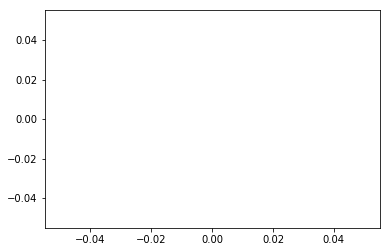

In [35]:
import matplotlib.pyplot as plt

plt.plot(eval_losses)
plt.show()

In [36]:
# as we see generator produces very similar vectors 
fake_rows[:,:9]

tensor([[2.4751, 2.4087, 2.4651, 2.5381, 2.7173, 2.5297, 2.4656, 2.4949, 2.4942],
        [2.4714, 2.4538, 2.5122, 2.4905, 2.6927, 2.4939, 2.3742, 2.5208, 2.5684],
        [2.5454, 2.4035, 2.4043, 2.4755, 2.7313, 2.5006, 2.3750, 2.5469, 2.5062],
        [2.4431, 2.4554, 2.5726, 2.5137, 2.7266, 2.5344, 2.4014, 2.5202, 2.5535],
        [2.5323, 2.4005, 2.4857, 2.5244, 2.6772, 2.4893, 2.3810, 2.5227, 2.5475],
        [2.4187, 2.4144, 2.4973, 2.5270, 2.6431, 2.5131, 2.4053, 2.5367, 2.6005],
        [2.5015, 2.3917, 2.5099, 2.5015, 2.6882, 2.5187, 2.4056, 2.5455, 2.5832],
        [2.4392, 2.4226, 2.4881, 2.4967, 2.7093, 2.5174, 2.4019, 2.5444, 2.5315],
        [2.4604, 2.3985, 2.4569, 2.4569, 2.7117, 2.5341, 2.4232, 2.5336, 2.5792],
        [2.4299, 2.4070, 2.5278, 2.4842, 2.6824, 2.5384, 2.4188, 2.5678, 2.4962],
        [2.4650, 2.3520, 2.4993, 2.5331, 2.7134, 2.5217, 2.4013, 2.4753, 2.4910],
        [2.5011, 2.3684, 2.5433, 2.5250, 2.6673, 2.5448, 2.4476, 2.4401, 2.5672],
        [2.4849,

In [37]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import torchvision.utils as vutils
from torch.autograd import Variable
import torch.nn.init as init
from os.path import isfile, isdir, join
import os
# from tensorboard_logger import configure, log_value

In [38]:
lrD = 5e-4
lrG = 5e-4
batch_size = 100
cuda = True
epochs = 100 #change
device = 5
seed = 1
nz = 10
d_iter = 5
g_iter = 1
lamba = 1e-2 # constant for L2 penalty (diversity)
name = "mnist-experiment"
# configure("runs/run-" + args.name, flush_secs=5)
torch.manual_seed(seed)


# data_loader = torch.utils.data.DataLoader(
#     datasets.MNIST('../data', train=True, download=True,
#     transform=transforms.Compose([
#     transforms.ToTensor(),
#     ])), batch_size=batch_size, shuffle=True)

In [39]:
# length=6
# batch_size=5

In [40]:
features_length = train.shape[1]
class NetD(torch.nn.Module):
    def __init__(self, use_cuda=True):
        super(NetD, self).__init__()
        self.use_cuda = use_cuda
        # top
        self.t1 = torch.nn.Linear(features_length, 1024)
        # bottom
        self.b1 = torch.nn.Linear(features_length, 1024)
        # combined
        self.fc = torch.nn.Linear(2 * 1024, features_length)
    def forward(self, xr, xf):
        # get filt
        filt = (torch.abs((real != 0).float() * fake - real))/real.shape[0]
#         filt = torch.abs((real != 0).float().cuda() * fake.cuda() - real.cuda())
#         filt = torch.abs((xr != 0).int() * xf - xr)
#         filt = 1 - (xr * (xf >= 0.5).float()) - ((1-xr) * (xf < 0.5).float())
        # random swap
        idr = torch.multinomial(torch.Tensor([0.5,0.5]), xr.size(0), replacement=True)
        idrx = idr.float().unsqueeze(1).expand_as(xr)
        if self.use_cuda: 
            idrx = idrx.cuda()
        idrx = Variable(idrx)
        xt = xr * idrx + xf * (1 - idrx)
        xb = xr * (1 - idrx) + xf * idrx
        # top : real
        xt = F.relu(self.t1(xt))
        # bottom : fake
        xb = F.relu(self.b1(xb))
        # combined
        x = torch.cat((xt, xb), 1)
        x = torch.tanh(self.fc(x))
        # apply filter, aggregate
#         print(filt.type(), x.type())
        x = filt * x

        x = x.mean(dim = 1).squeeze()
        # use sign, because of swapping
        sgn = idr * 2 - 1
        if self.use_cuda: 
            sgn = sgn.cuda()
        sgn = Variable(sgn.float())
        x = sgn * x
        return x
        
# netG = torch.nn.Sequential(
#     torch.nn.Linear(nz, 1024),
#     torch.nn.ReLU(),
#     torch.nn.Linear(1024, features_length),
#     torch.nn.Sigmoid()*5
#     )

class NetG(nn.Module):
    
    def __init__(self):

        super(NetG, self).__init__()

        self.net = nn.Sequential(
                                 nn.Linear(nz,1024),
                                 nn.ReLU(),
                                 nn.Linear(1024,features_length),
                                 nn.Sigmoid(),
                                 nn.Dropout(0.5)
                                    )
        
    def forward(self, x):
        x = self.net(x)
        return x*5 # to get values in range [0,5]
    
# networks
netD = NetD(use_cuda=False)
netG = NetG()
print(netG)
print(netD)
optimizerG = optim.RMSprop(netG.parameters(), lr=lrG)
optimizerD = optim.RMSprop(netD.parameters(), lr=lrD)
one = torch.FloatTensor([1])
mone = one * -1

NetG(
  (net): Sequential(
    (0): Linear(in_features=10, out_features=1024, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1024, out_features=3706, bias=True)
    (3): Sigmoid()
    (4): Dropout(p=0.5)
  )
)
NetD(
  (t1): Linear(in_features=3706, out_features=1024, bias=True)
  (b1): Linear(in_features=3706, out_features=1024, bias=True)
  (fc): Linear(in_features=2048, out_features=3706, bias=True)
)


In [41]:
one = torch.FloatTensor([1])
mone = one * -1
cuda = False
if cuda is True:
    netD.cuda()
    netG.cuda()
    one, mone = one.cuda(), mone.cuda()

In [42]:
for p in netD.parameters(): # reset requires_grad
    p.requires_grad = True #
    
for p in netG.parameters(): # reset requires_grad
    p.requires_grad = True #

In [43]:
# batch_size = 5

In [44]:
def getRealSample(length=6):
     return Variable(torch.IntTensor(np.random.choice([0, 1], size=(batch_size, length))))

In [45]:
get_random_batch(train, batch_size=batch_size).shape

torch.Size([100, 3706])

In [46]:
steps_per_epoch = 100
gen_iterations = 0
eval_losses = []
for epoch in range(epochs):
#     data_iter = iter(data_loader)
    i = 0
    while i < steps_per_epoch:
        ############################
        # (1) Update D network
        ###########################
        for p in netD.parameters(): # reset requires_grad
            p.requires_grad = True # they are set to False below in netG update
        d_iter = d_iter
        j = 0
        while j < d_iter:
            j += 1
            # load real data
            i += 1
#             X, _ = data_iter.next()
            X = get_random_batch(train, batch_size=batch_size)
#             print(X >= 0.5)
# #             X = X.view(X.size(0), -1)
#             X = (X >= 0.5).float()
            if cuda: 
                X = X.cuda()
            real = Variable(X)
            # generate fake data
            noise = torch.randn(batch_size, nz)
            if cuda: 
                noise = noise.cuda()
            with torch.no_grad():
                noisev = Variable(noise) # totally freeze netG
            fake = Variable(netG(noisev).data)
#             print(real.shape, fake.shape)
    
            # compute gradient, take step
            netD.zero_grad()
#             print('real', real)
#             print('fake', fake[:,0].sum())
            out = netD(real, fake)
            
            outputD = torch.mean(out) + lamba * out.norm()
            stdD = torch.std(out)
            outputD.backward(mone)
            optimizerD.step()
#             print(out.shape)
        ############################
        # (2) Update G network
        ###########################
        g_iter = g_iter
        j = 0
        while j < g_iter:
            j += 1
            for p in netD.parameters():
                p.requires_grad = False # to avoid computation
            netG.zero_grad()
            
            # load real data
            i += 1
            X = get_random_batch(train, batch_size=batch_size)
#             X = X.view(X.size(0), -1)
#             X = (X >= 0.5).float()
            if cuda: 
                X = X.cuda()
            real = Variable(X)
            
            # update generator
            noise = torch.randn(batch_size, nz)
            if cuda: 
                noise = noise.cuda()
            noisev = Variable(noise)
            fake = netG(noisev)
            out = netD(real, fake)
            outputG = torch.mean(out) + lamba * out.norm()
            stdG = torch.std(out)
            outputG.backward(one)
            optimizerG.step()

            gen_iterations += 1

#             print('[%d/%d][%d/%d][%d] Loss_D: %f Loss_G: %f '% (epoch, epochs, i, len(data_loader), gen_iterations, outputD.item(), outputG.item()))
#             print('output_D', outputD.item(), gen_iterations)
#             print('output_G', outputG.item(), gen_iterations)
#             print('std_D', stdD.item(), gen_iterations)
#             print('std_G', stdG.item(), gen_iterations)
            
            # evaluation
            if gen_iterations % 100 == 0: # todo- to change
#                 gen.eval()
#                 z_vector_eval = make_some_noise(128)
#                 fake_rows_eval = gen(z_vector_eval)
#                 real_rows_eval = get_random_batch(train, 128)
        #         print(fake_rows[0][:10]) enable to see some results
                eval_loss = F.mse_loss(fake, real, reduction='mean')
                eval_losses.append(eval_loss)
                print('Epoch number {}. my distance between random real and fake samples {}'.format(epoch, d_my(real, fake)))
                print('Epoch number {}. MSE distance between random real and fake samples {}'.format(epoch, eval_loss))

Epoch number 5. my distance between random real and fake samples 23961.705078125
Epoch number 11. my distance between random real and fake samples 14855.115234375
Epoch number 17. my distance between random real and fake samples 19585.462890625
Epoch number 23. my distance between random real and fake samples 18289.197265625
Epoch number 29. my distance between random real and fake samples 22368.3984375
Epoch number 35. my distance between random real and fake samples 18190.97265625
Epoch number 41. my distance between random real and fake samples 18577.69140625
Epoch number 47. my distance between random real and fake samples 19709.3828125
Epoch number 52. my distance between random real and fake samples 18464.466796875
Epoch number 58. my distance between random real and fake samples 19180.181640625
Epoch number 64. my distance between random real and fake samples 20401.185546875
Epoch number 70. my distance between random real and fake samples 19513.240234375
Epoch number 76. my dis

In [47]:
# torch.abs((real != 0).float().cuda() * fake.cuda() - real.cuda()).cuda().type()
torch.abs((real != 0).float() * fake - real).type()

'torch.FloatTensor'

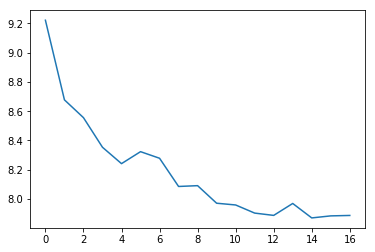

In [48]:
import matplotlib.pyplot as plt

plt.plot(eval_losses)
plt.show()

In [49]:
batch_size = ratings.shape[0]
batch_size

6040

In [50]:
noise = torch.randn(batch_size, nz)
if cuda: 
    noise = noise.cuda()
noisev = Variable(noise)
fake = netG(noisev)

In [51]:
print(5, (5 == fake.round()).sum(), (5 == ratings.round()).sum())
print(4, (4 == fake.round()).sum(), (4 == ratings.round()).sum())
print(3, (3 == fake.round()).sum(), (3 == ratings.round()).sum())
print(2, (2 == fake.round()).sum(), (2 == ratings.round()).sum())
print(1, (1 == fake.round()).sum(), (1 == ratings.round()).sum())
print(0, (0 == fake.round()).sum(), (0 == ratings.round()).sum())

5 tensor(1166747) 226310
4 tensor(4349346) 348971
3 tensor(3490518) 261197
2 tensor(1083305) 107557
1 tensor(186574) 56174
0 tensor(11198835) 21384031


In [52]:
# 11191494 > 21384031
fake_ratings = fake.detach().int().numpy().round()

In [53]:
fake_ratings

array([[0, 3, 5, ..., 3, 0, 0],
       [3, 0, 5, ..., 0, 0, 3],
       [3, 0, 0, ..., 3, 3, 3],
       ...,
       [4, 0, 6, ..., 0, 2, 3],
       [3, 0, 0, ..., 3, 0, 3],
       [3, 3, 5, ..., 0, 2, 0]])

In [54]:
# 11191494 > 21384031
fake_ratings.shape, ratings.shape

((6040, 3706), (6040, 3706))

In [55]:
get_sparsity(fake_ratings)

6040 users
3706 items


49.81731789866441

In [56]:
get_sparsity(ratings.round())

6040 users
3706 items


4.468362562231285

In [61]:
np.unique(fake_ratings)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [80]:
(fake_ratings > 5).sum()/(fake_ratings <= 5).sum()

0.030342203061957868

In [81]:
np.select([fake_ratings > 5])

TypeError: select() missing 1 required positional argument: 'choicelist'

In [79]:
(fake_ratings <= 5).sum()

21725054

In [86]:
c = fake_ratings.copy()

In [87]:
# fake_ratings[np.all((fake_ratings <= 5) & np.ones_like(fake_ratings), axis=1)]

array([], shape=(0, 3706), dtype=int32)

In [93]:
np.sum(fake_ratings[1, :] > 5)

112

In [94]:
adding_fake = fake_ratings[:300]

In [95]:
adding_fake[:,0]

array([0, 3, 3, 4, 0, 0, 0, 0, 4, 0, 0, 0, 0, 4, 3, 3, 0, 3, 4, 3, 0, 0,
       0, 0, 0, 4, 0, 4, 0, 3, 0, 0, 3, 3, 0, 3, 0, 0, 0, 0, 3, 0, 3, 0,
       4, 3, 4, 3, 3, 3, 3, 3, 0, 0, 3, 4, 0, 4, 3, 4, 0, 3, 0, 0, 0, 3,
       0, 3, 0, 0, 4, 3, 4, 0, 0, 0, 4, 0, 3, 3, 0, 0, 3, 3, 4, 0, 4, 0,
       0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 4, 3, 4, 3, 3, 0, 0, 3, 4, 4, 3,
       4, 3, 3, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 4, 3, 0, 0, 0,
       3, 0, 4, 3, 4, 3, 3, 3, 3, 4, 3, 0, 0, 0, 0, 0, 3, 3, 0, 3, 3, 4,
       0, 4, 0, 0, 4, 3, 3, 0, 0, 3, 0, 0, 0, 4, 3, 0, 0, 3, 0, 0, 4, 3,
       0, 4, 3, 3, 0, 3, 0, 0, 3, 3, 0, 4, 3, 0, 3, 3, 3, 4, 0, 3, 4, 4,
       4, 3, 0, 0, 0, 0, 3, 0, 0, 0, 3, 3, 4, 3, 4, 4, 3, 0, 0, 0, 0, 0,
       0, 0, 3, 3, 4, 0, 3, 0, 0, 0, 4, 3, 0, 0, 0, 0, 3, 3, 0, 3, 0, 0,
       4, 3, 0, 4, 3, 0, 3, 3, 0, 0, 0, 4, 4, 0, 3, 3, 0, 3, 3, 0, 3, 0,
       3, 4, 3, 3, 0, 0, 0, 0, 0, 4, 4, 0, 0, 4, 0, 0, 0, 3, 3, 0, 0, 0,
       0, 4, 0, 0, 0, 3, 0, 0, 0, 3, 0, 4, 4, 0])

In [96]:
adding_fake[:,3]

array([6, 5, 0, 3, 0, 5, 4, 4, 4, 3, 0, 0, 0, 0, 0, 0, 5, 0, 4, 0, 0, 4,
       0, 4, 0, 0, 0, 5, 0, 0, 0, 0, 3, 3, 0, 0, 6, 4, 0, 4, 0, 0, 5, 6,
       0, 0, 5, 4, 0, 4, 0, 5, 5, 4, 0, 5, 4, 5, 0, 5, 0, 3, 0, 5, 5, 5,
       0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 5, 4, 0, 0, 0, 0, 3, 4, 0, 0, 0,
       0, 4, 0, 5, 0, 4, 0, 5, 5, 5, 0, 5, 0, 0, 6, 4, 0, 0, 0, 4, 3, 0,
       5, 0, 0, 0, 0, 4, 0, 0, 5, 0, 0, 0, 0, 0, 3, 7, 5, 0, 0, 4, 0, 0,
       0, 5, 0, 0, 3, 6, 0, 0, 6, 5, 0, 0, 4, 5, 0, 4, 4, 3, 0, 4, 5, 4,
       0, 0, 5, 6, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 4, 0, 0, 0,
       6, 4, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 4, 0, 0, 5, 0, 0, 0, 4, 0,
       0, 0, 4, 0, 0, 6, 3, 4, 5, 0, 0, 0, 5, 0, 0, 5, 0, 5, 6, 0, 3, 0,
       4, 5, 0, 0, 0, 0, 4, 4, 4, 0, 5, 0, 0, 0, 4, 0, 0, 5, 4, 4, 3, 0,
       4, 0, 0, 0, 0, 0, 0, 4, 5, 4, 0, 0, 4, 0, 5, 0, 4, 0, 5, 0, 4, 5,
       0, 4, 5, 3, 4, 5, 0, 0, 4, 5, 0, 0, 5, 5, 3, 5, 0, 0, 4, 0, 0, 5,
       0, 0, 0, 0, 0, 0, 4, 0, 4, 3, 5, 0, 0, 5])

In [97]:
ratings.shape, adding_fake.shape

((6040, 3706), (300, 3706))

In [98]:
new_mat = np.append(ratings, adding_fake, axis=0)

In [99]:
new_mat.shape

(6340, 3706)

In [100]:
get_sparsity(new_mat)

6040 users
3706 items


6.611658815698306

In [101]:
get_sparsity(ratings)

6040 users
3706 items


4.468362562231285

In [102]:
np.clip(new_mat, 0,5, out=new_mat)

array([[5, 0, 0, ..., 0, 0, 0],
       [5, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [4, 3, 4, ..., 3, 2, 0],
       [4, 3, 5, ..., 0, 2, 0],
       [0, 3, 0, ..., 3, 3, 3]])

In [103]:
np.unique(new_mat)

array([0, 1, 2, 3, 4, 5])

In [104]:
MF_SGD = matrix_factorization.ExplicitMF(new_mat, 40, learning='sgd', verbose=True)
# iter_array = [1, 2, 5, 10, 25, 50, 100, 200]

iter_array = [10]
MF_SGD.calculate_learning_curve(iter_array, test, learning_rate=0.001)

Iteration: 10
	current iteration: 10
Train mse: 0.6570253470597726
Test mse: 0.8631349847185379


In [105]:
MF_SGD = matrix_factorization.ExplicitMF(train.numpy(), 40, learning='sgd', verbose=True)
# iter_array = [1, 2, 5, 10, 25, 50, 100, 200]

iter_array = [10]
MF_SGD.calculate_learning_curve(iter_array, test, learning_rate=0.001)

Iteration: 10
	current iteration: 10
Train mse: 0.8532536876504951
Test mse: 0.8692032685094621


In [106]:
MF_SGD = matrix_factorization.ExplicitMF(train.numpy(), 40, learning='als', verbose=True)
# iter_array = [1, 2, 5, 10, 25, 50, 100, 200]

iter_array = [10]
MF_SGD.calculate_learning_curve(iter_array, test, learning_rate=0.001)

Iteration: 10
	current iteration: 10
Train mse: 8.051797954664277
Test mse: 9.87048559826192


In [107]:
MF_SGD = matrix_factorization.ExplicitMF(new_mat, 40, learning='als', verbose=True)
# iter_array = [1, 2, 5, 10, 25, 50, 100, 200]

iter_array = [10]
MF_SGD.calculate_learning_curve(iter_array, test, learning_rate=0.001)

Iteration: 10
	current iteration: 10
Train mse: 4.4125864966591655
Test mse: 5.26301574081926


In [ ]:
https://github.com/lorenzMuller/kernelNet_MovieLens

In [ ]:
(fake[0] < 1).sum()

In [ ]:
(ratings[0] < 1).sum()

In [ ]:
fake.shape

In [ ]:
(4 == fake.round()).sum()

In [ ]:
(3 == fake.round()).sum()

In [ ]:
(2 == fake.round()).sum()

In [ ]:
(1 == fake.round()).sum()

In [ ]:
(0 == ratings.round()).sum()

In [ ]:
(3 == ratings.round()).sum()

In [ ]:
(5 == ratings.round()).sum()

In [ ]:
(4 == ratings.round()).sum()

In [ ]:
batch_size

In [ ]:
def random_row(n=10):
    elements = [0, 1, 2, 3, 4, 5]
    probabilities = [0.5, 0.1, 0.1, 0.1, 0.1, 0.1]
    return np.random.choice(elements, 10, p=probabilities)

In [ ]:
random_row(n=10)

In [ ]:
def d_dwgan(x_r, x_g):
    return sum(x_r != x_g)

In [ ]:
def d_my(x_r, x_g):
    return np.sum(np.abs((x_r != 0).astype(int) * x_g - x_r))

In [ ]:
d_my(x_r_2, x_g_2)

In [ ]:
x_r_1 = np.array([0, 0, 4, 0, 5, 0, 0, 0, 0, 0])
x_g_1 = np.array([0, 0, 3, 0, 4, 0, 0, 0, 0, 0])

x_r_2 = np.array([0, 0, 4, 0, 5, 0, 0, 0, 0, 0])
x_g_2 = np.array([0, 5, 3, 0, 4, 4, 0, 0, 0, 0])

In [ ]:
x_r_1, x_g_1

In [ ]:
x_r_2, x_g_2

In [ ]:
d_dwgan(x_r_1, x_g_1)

In [ ]:
d_dwgan(x_r_2, x_g_2)

In [ ]:
d_my(x_r_1, x_g_1)

In [ ]:
d_my(x_r_2, x_g_2)

In [ ]:
x_r = random_row(n=10)
x_g = random_row(n=10)

print('x real', x_r)
print('x gen ', x_g)

In [ ]:
d_dwgan(x_r, x_g)

In [ ]:
d_my(x_r, x_g)